## Plot winds from WRF experiments

In [1]:
# allow plots to be interactive in the notebook
%matplotlib notebook

import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime

import os 
import sys
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import cartopy 
import cartopy.crs as ccrs
import pyproj
from pynextsim.projection_info import ProjectionInfo



In [183]:
ds.time

<xarray.DataArray 'time' (time: 52)>
array(['2013-02-11T06:00:00.000000000', '2013-02-11T18:00:00.000000000',
       '2013-02-12T06:00:00.000000000', '2013-02-12T18:00:00.000000000',
       '2013-02-13T06:00:00.000000000', '2013-02-13T18:00:00.000000000',
       '2013-02-14T06:00:00.000000000', '2013-02-14T18:00:00.000000000',
       '2013-02-15T06:00:00.000000000', '2013-02-15T18:00:00.000000000',
       '2013-02-16T06:00:00.000000000', '2013-02-16T18:00:00.000000000',
       '2013-02-17T06:00:00.000000000', '2013-02-17T18:00:00.000000000',
       '2013-02-18T06:00:00.000000000', '2013-02-18T18:00:00.000000000',
       '2013-02-19T06:00:00.000000000', '2013-02-19T18:00:00.000000000',
       '2013-02-20T06:00:00.000000000', '2013-02-20T18:00:00.000000000',
       '2013-02-21T06:00:00.000000000', '2013-02-21T18:00:00.000000000',
       '2013-02-22T06:00:00.000000000', '2013-02-22T18:00:00.000000000',
       '2013-02-23T06:00:00.000000000', '2013-02-23T18:00:00.000000000',
       '2013-02-24T06:00:00.000000000', '2013-02-24T18:00:00.000000000',
       '2013-02-25T06:00:00.000000000', '2013-02-25T18:00:00.000000000',
       '2013-02-26T06:00:00.000000000', '2013-02-26T18:00:00.000000000',
       '2013-02-27T06:00:00.000000000', '2013-02-27T18:00:00.000000000',
       '2013-02-28T06:00:00.000000000', '2013-02-28T18:00:00.000000000',
       '2013-03-01T06:00:00.000000000', '2013-03-01T18:00:00.000000000',
       '2013-03-02T06:00:00.000000000', '2013-03-02T18:00:00.000000000',
       '2013-03-03T06:00:00.000000000', '2013-03-03T18:00:00.000000000',
       '2013-03-04T06:00:00.000000000', '2013-03-04T18:00:00.000000000',
       '2013-03-05T06:00:00.000000000', '2013-03-05T18:00:00.000000000',
       '2013-03-06T06:00:00.000000000', '2013-03-06T18:00:00.000000000',
       '2013-03-07T06:00:00.000000000', '2013-03-07T18:00:00.000000000',
       '2013-03-08T06:00:00.000000000', '2013-03-08T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-02-11T06:00:00 ... 2013-03-08T18:00:00
Attributes:
    standard_name:  time
    long_name:      simulation time
    bounds:         time_bnds

In [7]:
#inpath ='/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/wrf10/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/wrf20/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/wrf40/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/wrf80/'
inpath ='/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_00_wrf10km/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_05_wrf_40km/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_02_era5/'
#inpath ='/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_03_cfsr/'

outpath_plots = '/cluster/work/users/rheinlender/plots/'

# get folder name
prefix = os.path.basename(os.path.normpath(inpath))
print(prefix)

fl = sorted(glob(inpath+'outputs/'+'Moorings.nc'))
#fl = sorted(glob(inpath+'Moorings.nc'))

# Open multiple nc files
ds = xr.open_mfdataset(fl)
ds

expt_00_wrf10km


<xarray.Dataset>
Dimensions:                   (nv: 2, time: 52, x: 359, y: 323)
Coordinates:
  * time                      (time) datetime64[ns] 2013-02-11T06:00:00 ... 2...
Dimensions without coordinates: nv, x, y
Data variables:
    Polar_Stereographic_Grid  int32 ...
    time_bnds                 (time, nv) datetime64[ns] dask.array<chunksize=(52, 2), meta=np.ndarray>
    longitude                 (y, x) float32 dask.array<chunksize=(323, 359), meta=np.ndarray>
    latitude                  (y, x) float32 dask.array<chunksize=(323, 359), meta=np.ndarray>
    siu                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    siv                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    wndx                      (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    wndy                      (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    sic                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    sit                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    snt                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    hfos                      (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    hfs                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    sfo                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    damage                    (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    hfsl                      (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    hfss                      (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    rls                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    rss                       (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
    wspeed                    (time, y, x) float32 dask.array<chunksize=(52, 323, 359), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    source:       neXtSIM model fields

In [3]:
# Calculate variables to plot

#data = ds.sel(time=slice('2013-02-19','2013-02-27'), x=ds.x < 400, y = slice(100,500))
data = ds.sel(time=slice('2013-02-19','2013-02-27'))

# get daily time array
date = data['time'].groupby('time.dayofyear').mean()

lons = data['longitude']
lats = data['latitude']

# ice thickness
sit = data.sit.groupby('time.dayofyear').mean(dim='time', skipna=False)

# ice velocities
u = data.siu.groupby('time.dayofyear').mean(dim='time', skipna=False)
v = data.siv.groupby('time.dayofyear').mean(dim='time', skipna=False)

# heat fluxes (Surface Upward Heat Flux In Air)
hfs = data.hfs.groupby('time.dayofyear').mean(dim='time', skipna=False)

uwnd = data.wndx.groupby('time.dayofyear').mean(dim='time', skipna=False)
ywnd = data.wndy.groupby('time.dayofyear').mean(dim='time', skipna=False)


In [4]:
# Calculate wind speed 

spd = np.hypot(uwnd, ywnd) # wind speed


<IPython.core.display.Javascript object>


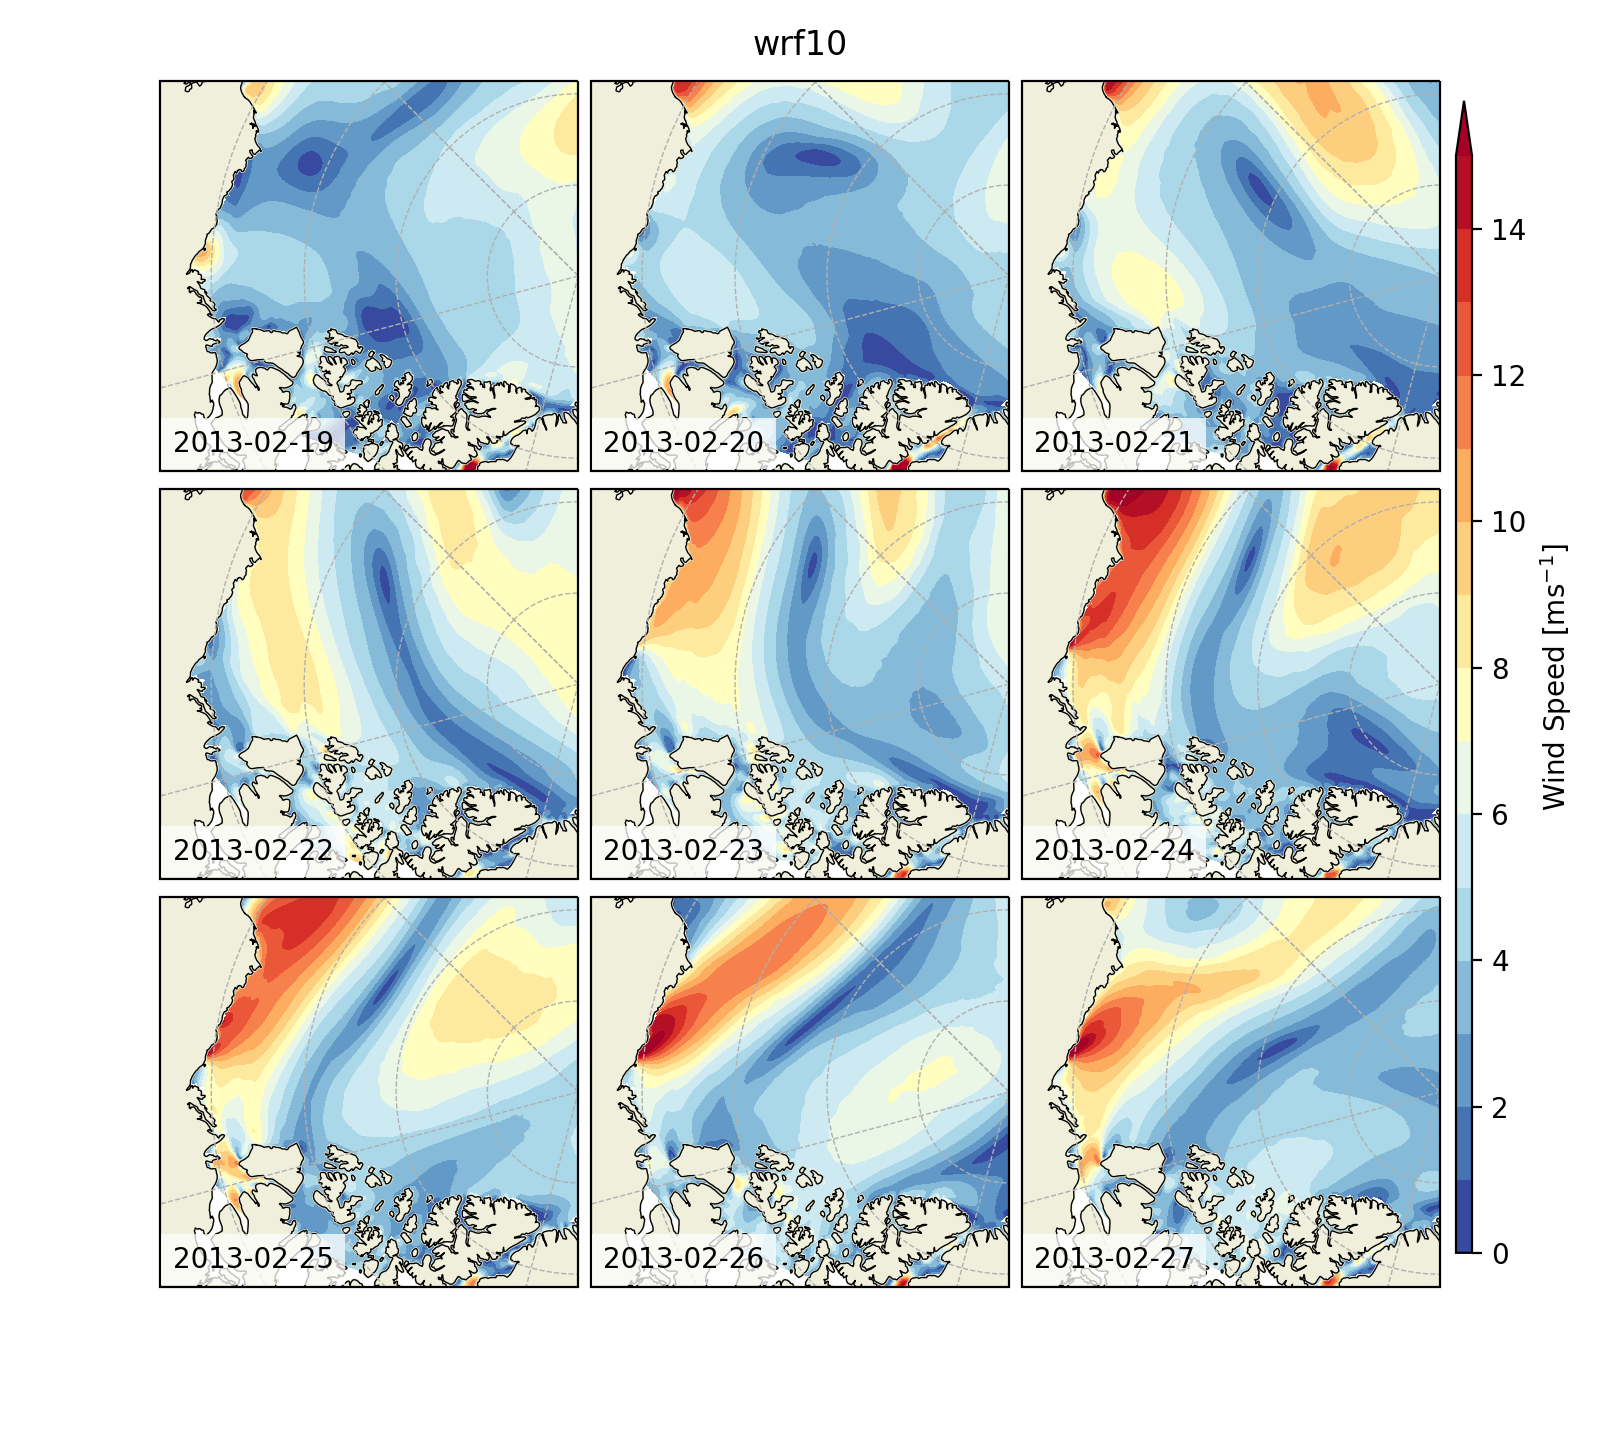

In [5]:
def make_figure():
    ar = 0.9  # initial aspect ratio for first trial
    wi = 8    # width in inches
    hi = wi * ar  # height in inches

    fig = plt.figure(figsize=(wi,hi))

    plt.subplots_adjust(hspace=0.01, wspace=0.01, top=0.95, bottom=0.1, left=0.075, right=0.925)

    gs = gridspec.GridSpec(3,3)
    
    return fig, gs 


# PLOTTING
plt.close('all')

vmin=15
vmax=-15
cmap='RdYlBu_r'

# make discrete colormap
clevs = np.arange(0, 15+1, 1)

#extent = [-180, 180, 57, 90]
extent = [-110, 200, 65, 90]   #zoom on Beaufort Sea
proj = ProjectionInfo() # default nextsim projection
crs=proj.crs

fig, gs = make_figure();

# loop over dates
for i in range(len(date)):
    tmp=spd[i,:,:]
    
     # Get x-y grid from model
    x,y=proj.pyproj(lons.values, lats.values) # init grid using x,y coords of grid
    x_extent = [(x,y)[0][0][0], (x,y)[0][0][-1]] 
    y_extent = [(x,y)[1][0][0], (x,y)[1][-1][0]]
    ex_lim=1
    x_extent = [(x,y)[0][0][ex_lim], (x,y)[0][0][-ex_lim]]
    y_extent = [(x,y)[1][ex_lim][0], (x,y)[1][-ex_lim][0]]
    
    ax = plt.subplot(gs[i], projection=crs, extent=extent)

    cs=ax.contourf(tmp, zorder=1, extent=[*x_extent, *y_extent],levels=clevs,cmap=cmap, extend='max')

    ax.add_feature(cartopy.feature.LAND,zorder=1,alpha=1)
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.set_aspect(1)
    ax.gridlines(zorder=2,linewidth=0.5, alpha=1,linestyle="--")

    # add title inside subplots
    title = str(date[i].values)[:10]
    
    ax.text(0.03,0.05,title,
        horizontalalignment='left',
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='None', alpha=0.75))
    
# add colorbar    
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.1, right=0.9, wspace=0.03, hspace=0.0)
cb_ax = fig.add_axes([0.91, 0.13, 0.01, 0.8])
cbar = fig.colorbar(cs, cax=cb_ax)    
cbar.set_label("Wind Speed [$\mathrm{m s^{-1}}$]")

# Set the title for the figure
#title_string = nc_sel[var].long_name + ' ['+nc_sel[var].units+'] '
fig.suptitle(prefix)
    
# save figure
outpath_plots = '/cluster/home/rheinlender/projects/aoi_case_study/python/plots/wrf/'
figname ='wndspd_BeaufortSea_20130219-20130227_'+prefix+'.png'    
plt.savefig( outpath_plots+figname, dpi=150, bbox_inches='tight')

<IPython.core.display.Javascript object>


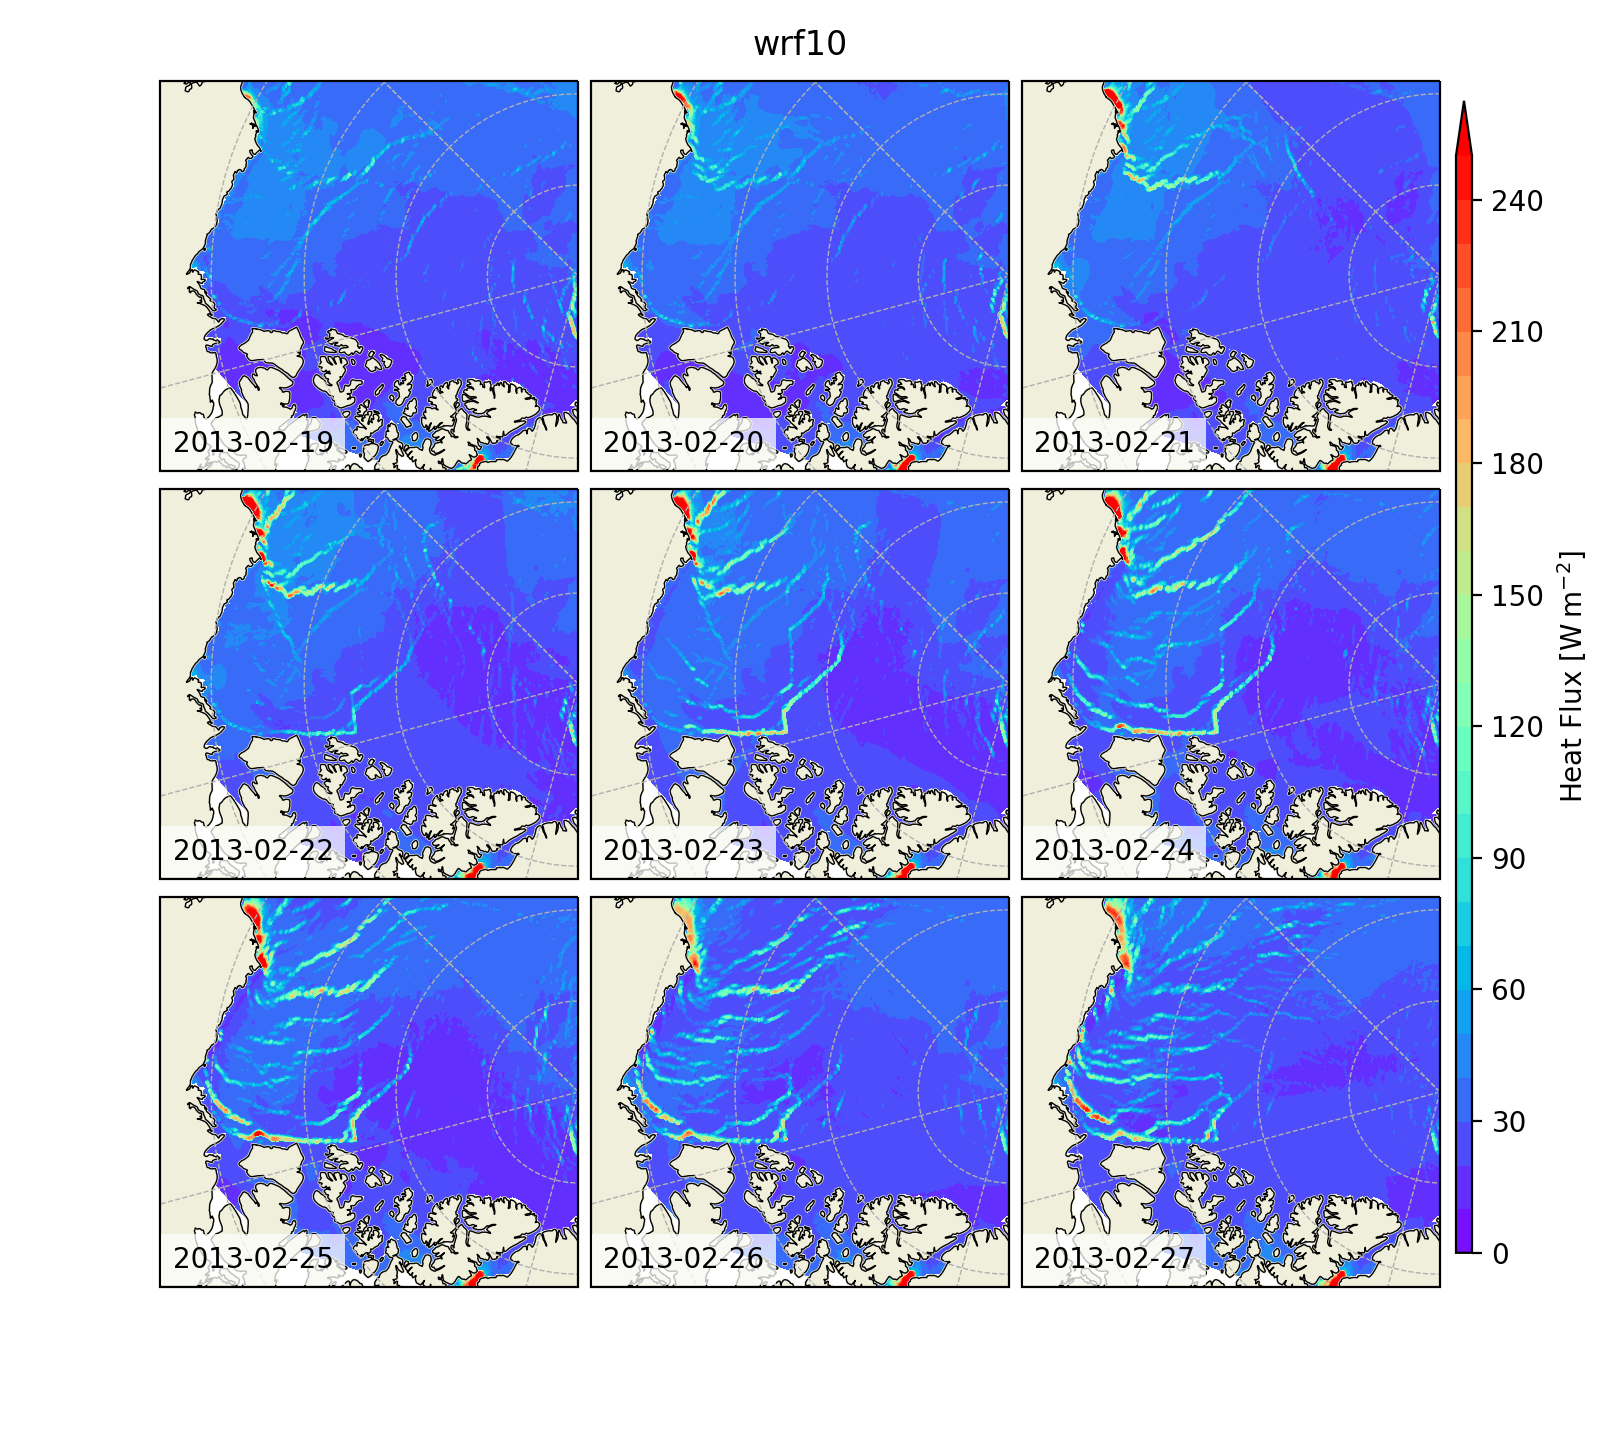

In [6]:
# Plot heat flux through sea ice

plt.close('all')

vmin=15
vmax=-15
cmap='rainbow'

# make discrete colormap
clevs = np.arange(0, 250+10, 10)

#extent = [-180, 180, 57, 90]
extent = [-110, 200, 65, 90]   #zoom on Beaufort Sea
proj = ProjectionInfo() # default nextsim projection
crs=proj.crs

fig, gs = make_figure();

# loop over dates
for i in range(len(date)):
    tmp=hfs[i,:,:]
    
     # Get x-y grid from model
    x,y=proj.pyproj(lons.values, lats.values) # init grid using x,y coords of grid
    x_extent = [(x,y)[0][0][0], (x,y)[0][0][-1]] 
    y_extent = [(x,y)[1][0][0], (x,y)[1][-1][0]]
    ex_lim=1
    x_extent = [(x,y)[0][0][ex_lim], (x,y)[0][0][-ex_lim]]
    y_extent = [(x,y)[1][ex_lim][0], (x,y)[1][-ex_lim][0]]
    
    ax = plt.subplot(gs[i], projection=crs, extent=extent)

    cs=ax.contourf(tmp, zorder=1, extent=[*x_extent, *y_extent],levels=clevs,cmap=cmap, extend='max')

    ax.add_feature(cartopy.feature.LAND,zorder=1,alpha=1)
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.set_aspect(1)
    ax.gridlines(zorder=2,linewidth=0.5, alpha=1,linestyle="--")

    # add title inside subplots
    title = str(date[i].values)[:10]
    
    ax.text(0.03,0.05,title,
        horizontalalignment='left',
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='None', alpha=0.75))
    
# add colorbar    
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.1, right=0.9, wspace=0.03, hspace=0.0)
cb_ax = fig.add_axes([0.91, 0.13, 0.01, 0.8])
cbar = fig.colorbar(cs, cax=cb_ax)    
cbar.set_label("Heat Flux [$\mathrm{W \: m^{-2}}$]")

# Set the title for the figure
#title_string = nc_sel[var].long_name + ' ['+nc_sel[var].units+'] '
fig.suptitle(prefix)
    
# save figure
outpath_plots = '/cluster/home/rheinlender/projects/aoi_case_study/python/plots/wrf/'
figname ='hfs_BeaufortSea_20130219-20130227_'+prefix+'.png'    
plt.savefig( outpath_plots+figname, dpi=150, bbox_inches='tight')

<IPython.core.display.Javascript object>


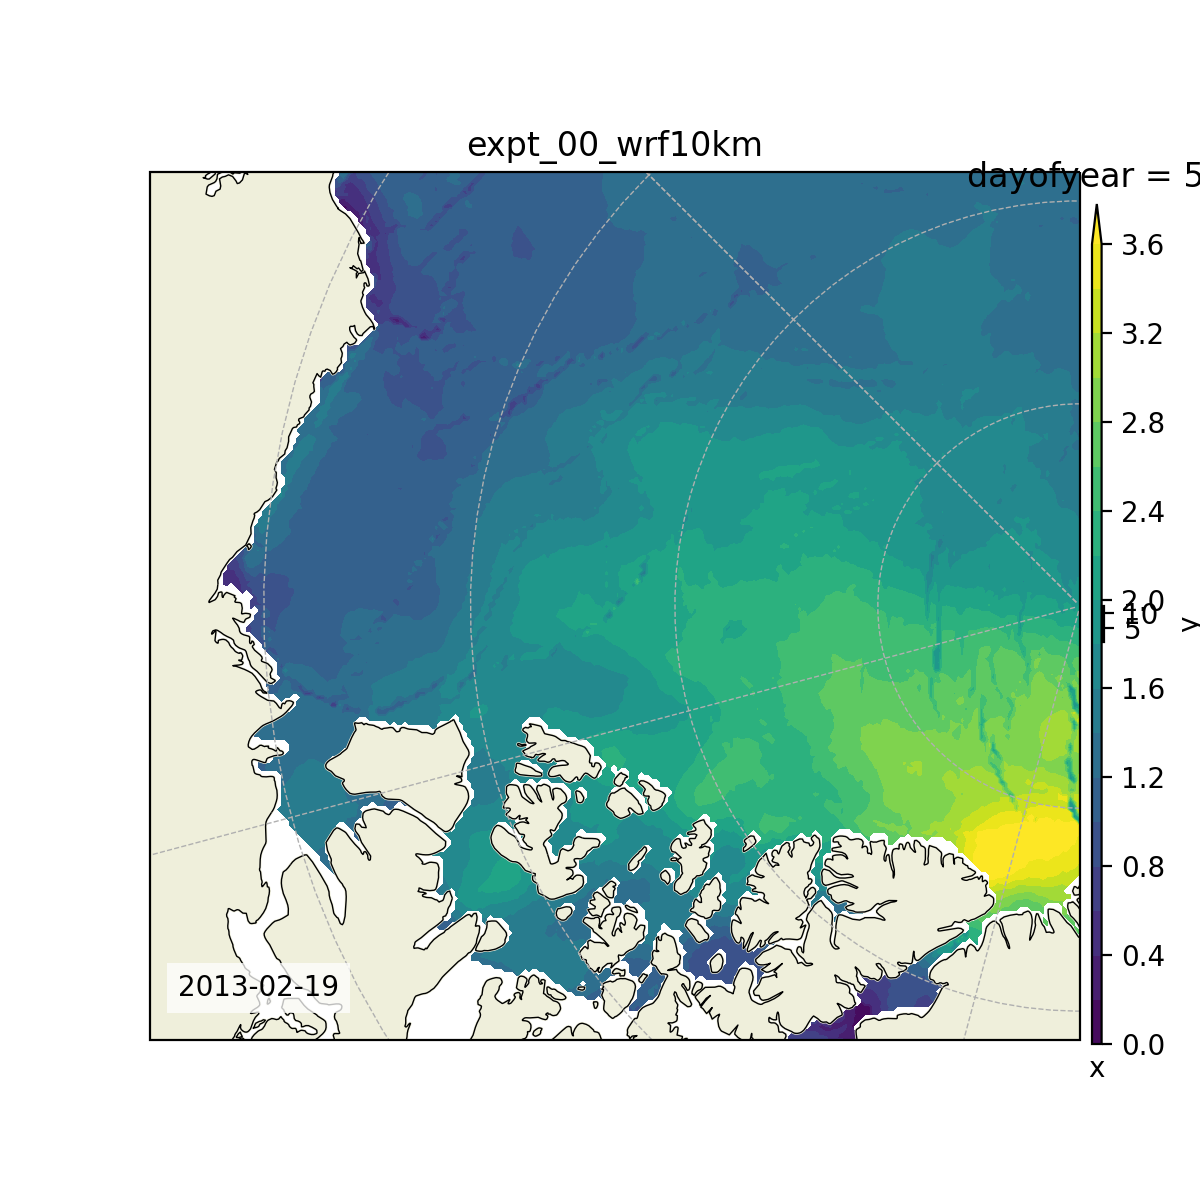

In [83]:
# plot thickness ditribution

plt.close('all')

vmin=15
vmax=-15
cmap='viridis'

# make discrete colormap
clevs = np.arange(0, 3.6+.2, .2)

#extent = [-180, 180, 57, 90]
extent = [-110, 200, 65, 90]   #zoom on Beaufort Sea
proj = ProjectionInfo() # default nextsim projection
crs=proj.crs

fig = plt.figure(figsize=(6,6))
    
# Get x-y grid from model
x,y=proj.pyproj(lons.values, lats.values) # init grid using x,y coords of grid
x_extent = [(x,y)[0][0][0], (x,y)[0][0][-1]] 
y_extent = [(x,y)[1][0][0], (x,y)[1][-1][0]]
ex_lim=1
x_extent = [(x,y)[0][0][ex_lim], (x,y)[0][0][-ex_lim]]
y_extent = [(x,y)[1][ex_lim][0], (x,y)[1][-ex_lim][0]]
    
ax = plt.subplot(111, projection=crs, extent=extent)
cs=ax.contourf(sit[0], zorder=1, extent=[*x_extent, *y_extent],levels=clevs,cmap=cmap, extend='max')

ax.add_feature(cartopy.feature.LAND,zorder=1,alpha=1)
ax.coastlines(resolution='50m', linewidth=0.5)
ax.set_aspect(1)
ax.gridlines(zorder=2,linewidth=0.5, alpha=1,linestyle="--")

# add title inside subplots
title = str(date[0].values)[:10]
    
ax.text(0.03,0.05,title,
        horizontalalignment='left',
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='None', alpha=0.75))
    
# add colorbar    

cb_ax = fig.add_axes([0.91, 0.13, 0.01, 0.7])
cbar = fig.colorbar(cs, cax=cb_ax)    
cbar.set_label("Thickness [$\mathrm{m}$]")

# Set the title for the figure
#title_string = nc_sel[var].long_name + ' ['+nc_sel[var].units+'] '
ax.set_title(prefix)
    
# save figure
outpath_plots = '/cluster/home/rheinlender/projects/aoi_case_study/python/plots/wrf/'
figname ='sit_BeaufortSea_20130219_'+prefix+'.png'    
plt.savefig( outpath_plots+figname, dpi=150, bbox_inches='tight')

<IPython.core.display.Javascript object>


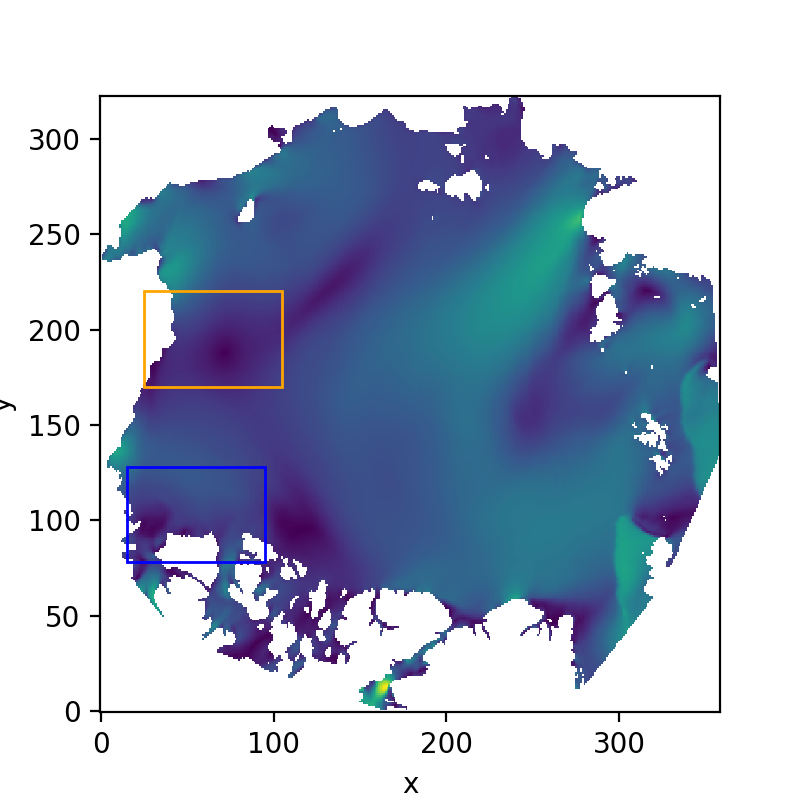

<IPython.core.display.Javascript object>


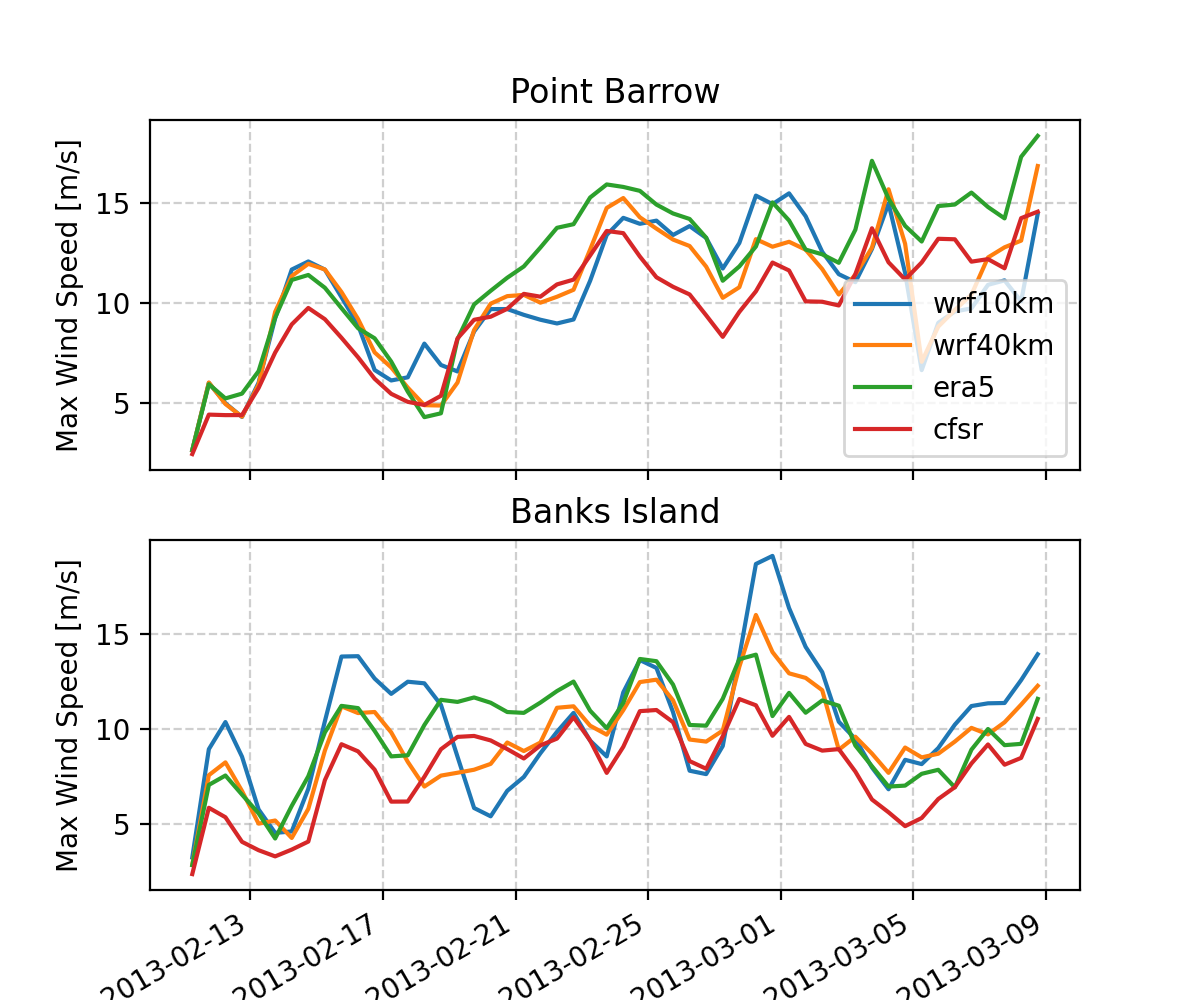

/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_00_wrf10km/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_05_wrf_40km/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_02_era5/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_03_cfsr/outputs/Moorings.nc


In [189]:
# Plot peak  winds in Eastern and Western Beaufort Sea

plt.close('all')

# define regions
#wbnds = (25, 160, 125, 80)
#ebnds = (15, 78, 125, 80)

wbnds = (25, 170, 80, 50) #Point Barrow 
ebnds = (15, 78, 80, 50)   #Banks Island


# Make figure showing domain
fig = plt.figure(figsize=(4,4))
ax=plt.subplot(111)
spd[0].plot.imshow(add_colorbar=False)
rect_east=plt.Rectangle((ebnds[0], ebnds[1]), ebnds[2], ebnds[3],
                   edgecolor = 'blue',
                   fill=False)
rect_west=plt.Rectangle((wbnds[0], wbnds[1]), wbnds[2], wbnds[3],
                   edgecolor = 'orange',
                   fill=False)
ax.add_patch(rect_east)
ax.add_patch(rect_west)
ax.set_title('')
plt.savefig( outpath_plots+'boxes_BeaufortSea.png', dpi=150, bbox_inches='tight')

# directories to loop over
prefix = ['expt_00_wrf10km', 'expt_05_wrf_40km', 'expt_02_era5',  'expt_03_cfsr'] 
legstr = ['wrf10km', 'wrf40km', 'era5',  'cfsr'] 

# Initialize figure
fig, ax = plt.subplots(2,figsize=(6,5) )

# loop over directories
rootdir = '/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/'
filename='Moorings.nc'
n=0
for dirs in prefix:
    fl = rootdir+dirs+'/outputs/'+'Moorings.nc'
    print(fl)
    
    # use xarray to open files
    nc = xr.open_dataset(fl); 

    lons = nc.longitude[:]
    lats = nc.latitude[:]
    
    # calculate max winds in boxes
    wndspd = np.hypot(nc['wndx'], nc['wndy']) 
    wnd_east = wndspd.sel(x=slice(ebnds[0],ebnds[0]+ebnds[2]), y = slice(ebnds[1],ebnds[1]+ebnds[3]))
    wnd_west = wndspd.sel(x=slice(wbnds[0],wbnds[0]+wbnds[2]), y = slice(wbnds[1],wbnds[1]+wbnds[3]))

    # plot
    line_west = wnd_west.max(("x", "y")).plot(ax=ax[0], label=legstr[n])
    line_east = wnd_east.max(("x", "y")).plot(ax=ax[1], label=legstr[n])
    n+=1
    
ax[0].legend()
ax[1].set_title('Banks Island')
ax[0].set_title('Point Barrow')
ax[0].set_ylabel('Max Wind Speed [m/s]')
ax[1].set_ylabel('Max Wind Speed [m/s]')

ax[0].grid(True, linestyle='--', alpha=0.6)
ax[1].grid(True, linestyle='--', alpha=0.6)

for ax in fig.get_axes():
    ax.label_outer()

    
# save figure
outpath_plots = '/cluster/home/rheinlender/projects/aoi_case_study/python/plots/wrf/'
figname ='maxWinds_PointBarrow_BanksIsland_20130213-20130308'+'.png'    
plt.savefig( outpath_plots+figname, dpi=150, bbox_inches='tight')

<IPython.core.display.Javascript object>


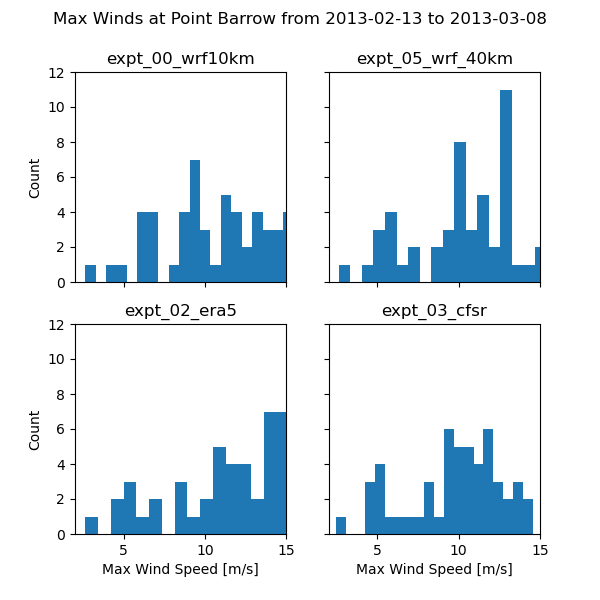

/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_00_wrf10km/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_05_wrf_40km/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_02_era5/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_03_cfsr/outputs/Moorings.nc


In [218]:
# Plot histogram

def make_figure():
    fig, ax = plt.subplots(2,2,figsize=(6,6) ) 
    ax = ax.ravel()

    return fig, ax

fig, ax = make_figure();

def plot_hist(ax, data, nbins, title):
    
    my_hist = data.max(("x", "y")).plot.hist(bins=nbins, ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel('Max Wind Speed [m/s]')
    ax.set_ylabel('Count')
    
    return my_hist

nbins=20

# loop over directories
rootdir = '/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/'
filename='Moorings.nc'
n=0
for dirs in prefix:
    fl = rootdir+dirs+'/outputs/'+'Moorings.nc'
    print(fl)
    
    # use xarray to open files
    nc = xr.open_dataset(fl); 
    lons = nc.longitude[:]
    lats = nc.latitude[:]
    
    # calculate max winds in boxes
    wndspd = np.hypot(nc['wndx'], nc['wndy']) 
    wnd_east = wndspd.sel(x=slice(ebnds[0],ebnds[0]+ebnds[2]), y = slice(ebnds[1],ebnds[1]+ebnds[3]))
    wnd_west = wndspd.sel(x=slice(wbnds[0],wbnds[0]+wbnds[2]), y = slice(wbnds[1],wbnds[1]+wbnds[3]))
                               
    # plot histogram
   # hist_east = plot_hist(ax[n],wnd_east, nbins, prefix[n])
    hist_west = plot_hist(ax[n],wnd_west, nbins, prefix[n])

    n+=1

    
#fig.suptitle('Max Winds at Banks Island from 2013-02-13 to 2013-03-08')
fig.suptitle('Max Winds at Point Barrow from 2013-02-13 to 2013-03-08')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim([2, 15])
    ax.set_ylim([0, 12])

<AxesSubplot:>

/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_00_wrf10km/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_05_wrf_40km/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_02_era5/outputs/Moorings.nc
/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_03_cfsr/outputs/Moorings.nc


/cluster/work/users/rheinlender/breakup2013/WRF-exp/outputs/from_Tim/expt_05_wrf_40km/outputs/Moorings.nc


<xarray.Dataset>
Dimensions:                   (nv: 2, time: 52, x: 359, y: 323)
Coordinates:
  * time                      (time) datetime64[ns] 2013-02-11T06:00:00 ... 2...
Dimensions without coordinates: nv, x, y
Data variables:
    Polar_Stereographic_Grid  int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    longitude                 (y, x) float32 ...
    latitude                  (y, x) float32 ...
    siu                       (time, y, x) float32 ...
    siv                       (time, y, x) float32 ...
    wndx                      (time, y, x) float32 ...
    wndy                      (time, y, x) float32 ...
    sic                       (time, y, x) float32 ...
    sit                       (time, y, x) float32 ...
    snt                       (time, y, x) float32 ...
    hfos                      (time, y, x) float32 ...
    hfs                       (time, y, x) float32 ...
    sfo                       (time, y, x) float32 ...
    damage                    (time, y, x) float32 ...
    hfsl                      (time, y, x) float32 ...
    hfss                      (time, y, x) float32 ...
    rls                       (time, y, x) float32 ...
    rss                       (time, y, x) float32 ...
    wspeed                    (time, y, x) float32 ...
Attributes:
    Conventions:  CF-1.6
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    source:       neXtSIM model fields